# Exploratory Analysis of Tweets in Singapore 

Some of the tweets acquired were already collected in Sept/Oct 2020 and written into text file. Here we perform exploratory data analysis on one day's tweets in Singapore collected.

In [1]:
import geopandas
import pandas as pd 
import os, sys
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
import numpy as np 

In [32]:
tweet_file = r"C:\Users\ytxu\Documents\GitHub\PythonShowcase\002_twitter\data\tweets.txt"
tweet_df = pd.read_csv(tweet_file, sep="|",error_bad_lines=False)   # ignore error records

b'Skipping line 412: expected 23 fields, saw 28\nSkipping line 622: expected 23 fields, saw 26\nSkipping line 699: expected 23 fields, saw 26\n'
b'Skipping line 42858: expected 23 fields, saw 28\nSkipping line 54319: expected 23 fields, saw 26\n'
b'Skipping line 102582: expected 23 fields, saw 26\n'
C:\Users\ytxu\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
tweet_df.head()

,Created_At,Tweet_ID,Truncated,Text,Source,Source_URL,User_Name,User_Screen_Name,User_Location,Tweet_Coordinates_Type,...,Place_URL,Place_Type,Place_Name,Place_Full_Name,Place_Country,Place_BoundingBox_Coordinates,Place_BoundingBox_Type,Place_Attributes,Language,Timestamp_MS
0,2020-10-07 23:59:57,1313871696869257216,False,@sibarbiesulu @IzzuddinSafuan Lagu tu,Twitter for Android,http://twitter.com/download/android,♔S.A.R.I ♔,laiylasari,Johor,None,...,None,None,None,None,None,None,None,None,in,NaN
1,2020-10-07 23:59:57,1313871694398853121,False,"@nndzy_ Sabar , tu semua lumrah bekerja ✨ semo...",Twitter for iPhone,http://twitter.com/download/iphone,دَ,shahiela_,"Johore, Malaysia",None,...,None,None,None,None,None,None,None,None,in,NaN
2,2020-10-07 23:59:57,1313871693916467205,False,RT @tjayamalarJ: Director Shankar with @Siva_K...,Twitter for Android,http://twitter.com/download/android,Nagaraj,Nagaraj63942261,NaN,None,...,None,None,None,None,None,None,None,None,en,NaN
3,2020-10-07 23:59:56,1313871693669044224,False,RT @mahasiswaYUJIEM: Silahkan dibaca dan sebar...,Twitter for iPhone,http://twitter.com/download/iphone,riri ♡ ᴱᴺ⁻,nikittenns,𝐄𝐍𝐇𝐘𝐏𝐄𝐍• ₊°✧︡,None,...,None,None,None,None,None,None,None,None,in,NaN
4,2020-10-07 23:59:56,1313871689722208256,False,@ntaesarr How eh 😂😂,Twitter for Android,http://twitter.com/download/android,nza ✨,ztlnjw,"Johore, Malaysia",None,...,None,None,None,None,None,None,None,None,tl,NaN


In [15]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180774 entries, 0 to 180773
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Created_At                     180774 non-null  object 
 1   Tweet_ID                       180774 non-null  object 
 2   Truncated                      180774 non-null  object 
 3   Text                           180774 non-null  object 
 4   Source                         180700 non-null  object 
 5   Source_URL                     180773 non-null  object 
 6   User_Name                      180711 non-null  object 
 7   User_Screen_Name               180773 non-null  object 
 8   User_Location                  137510 non-null  object 
 9   Tweet_Coordinates_Type         180773 non-null  object 
 10  Longitude                      180773 non-null  object 
 11  Latitude                       180773 non-null  object 
 12  Place_ID                      

In [23]:
tweet_df[['Longitude', 'Latitude']].head()

,Longitude,Latitude
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None


In [39]:
# evaluate tweet location
count_with_coordinates = len(tweet_df[tweet_df['GeocodeType']=='coordinates'])
count_with_coordinates

0

In [26]:
tweet_df['Tweet_Coordinates_Type'].value_counts()

None     180366
Point       407
Name: Tweet_Coordinates_Type, dtype: int64

In [27]:
tweets_wo_coordinates = tweet_df[tweet_df['Longitude']=='None']
tweets_wo_coordinates['Place_Type'].value_counts()

None       176008
admin        2282
city         1976
poi            62
country        38
Name: Place_Type, dtype: int64

User_location is ignored because it does not represent the actual location where the tweet is posted. From above we can generally classify tweet locations into a few types:
- with exact coordinates: Longitude/Latitude will be specific values - only 407 tweets out of 180k tweets are precisely geocoded this way;
- Without coordinates but described by some location names in a range of specificity - this gives another 4-5k tweets 
- No geotag at the attribute level. These tweets may possibly reveal location info within the text. We will not go into the details here.

In [45]:
# create a new column to represent this
tweet_df['GeocodeType'] = tweet_df['Place_Type']
t_index = tweet_df[tweet_df['Longitude']!='None'].index
tweet_df.loc[t_index, 'GeocodeType'] = 'coordinates'
tweet_df['GeocodeType'].value_counts()

None           176008
admin            2282
city             1976
coordinates       408
poi                62
country            38
Name: GeocodeType, dtype: int64

No handles with labels found to put in legend.


Text(0, 0.5, 'Number of Tweets')

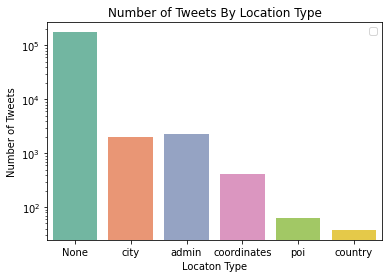

In [92]:
# create a chart of the language classes
ax=sns.countplot(x="GeocodeType", data=tweet_df, palette="Set2")
ax.set_yscale("log")
ax.set_title("Number of Tweets By Location Type")
ax.legend()
ax.set_xlabel("Locaton Type")
ax.set_ylabel("Number of Tweets")

In [93]:
from shapely.geometry import Point

In [97]:
def create_geom(x):

    coord = Point((float(x['Longitude']), float(x['Latitude'])))
    return coord

In [115]:
# filter only those with coordinates and create geometry column
tweet_w_coords = tweet_df.loc[(tweet_df['Longitude']!='None') & (tweet_df['Latitude']!='None')]
tweet_w_coords = tweet_w_coords.dropna(how='any', subset=['Longitude','Latitude'])
# tweet_w_coords['geometry'] = tweet_w_coords.apply(lambda x: create_geom(x), axis=1)

In [112]:
tweet_w_coords[['Longitude','Latitude', 'geometry']].head()

,Longitude,Latitude,geometry
304,103.85333698,1.34042722,POINT (103.85333698 1.34042722)
999,103.856,1.29306,POINT (103.856 1.29306)
1732,103.94034883,1.32169811,POINT (103.94034883 1.32169811)
2743,103.74805228,1.38054529,POINT (103.74805228 1.38054529)
3738,103.74436,1.49711,POINT (103.74436 1.49711)


In [117]:
gdf = geopandas.GeoDataFrame(
    tweet_w_coords, geometry=geopandas.points_from_xy(tweet_w_coords.Longitude, tweet_w_coords.Latitude))

In [132]:
import contextily as ctx
import folium

In [162]:
map = folium.Map(location = [1.3900, 103.85], tiles='OpenStreetMap' , zoom_start = 11)
map

In [170]:
from folium.plugins import MarkerCluster

In [175]:
map = folium.Map(location = [1.3900, 103.85], tiles='CartoDB dark_matter' , zoom_start = 11)

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry ]

i = 0
marker_cluster = folium.plugins.MarkerCluster().add_to(map)
for coordinates in geo_df_list:

    #now place the markers with the popup labels and data
    
    popup ="<strong>User: </strong>" + str(gdf.iloc[i]['User_Screen_Name']) + '<br>' +\
           "<strong>Time: </strong>" + str(gdf.iloc[i]['Created_At']) + '<br>' +\
            "<strong>Location: </strong>" + str(gdf.iloc[i]['Place_Full_Name']) + '<br>' + \
            "<strong>Tweet: </strong>" + str(gdf.iloc[i]['Text']) + '<br>'
    folium.Marker(coordinates, popup=popup).add_to(marker_cluster)
    i = i + 1

map

![alt text](./data/Map1.jpg)

In [178]:
# a closer look
map

![alt text](./data/Map2.jpg)

In [177]:
# heat map will be a good representative of density
from folium import plugins

map2 = folium.Map(location = [1.3900, 103.85], tiles='Cartodb dark_matter', zoom_start = 11)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry ]
plugins.HeatMap(heat_data).add_to(map2)
map2